# Impact of Spectre/Meltdown patch on performance (CSD3 Skylake)

This notebook contains the results of the ARCHER benchmarks run before and after patching for the Spectre/Meltdown security issues on the CSD3 Skylake system at the University of Cambridge.

No siginificant performance difference can be seen for any of the benchmarks apart from the synthetic test of parallel write performance (benchio) where we see a 10-15% performance drop in terms of the maximum write bandwidth achieved. This variation is within the variation we would expect from a parallel file system during normal operation so may not be associated with the patching process.

The results for the random ring latency in the HPCC b_eff benchmark show some odd features that require further investigation.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
sns.set_context("paper")

In [2]:
import sys
sys.path.append('../python-modules')

## Application Benchmarks

### CASTEP Al Slab (al3x3)

In [3]:
from appanalysis import castep

In [4]:
castep_unpatched = {1:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.1nodes',
                    2:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.2nodes',
                    4:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.4nodes',
                    8:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.8nodes',
                    16:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.16nodes'}

In [5]:
cpn = 32
cores_unpatched, scf_unpatched, su_unpatched = castep.calcperf(castep_unpatched, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              1              32            61.3            1.00
              2              64            31.4            1.95
              4             128            19.7            3.10
              8             256            14.1            4.35
             16             512            10.5            5.81


In [6]:
castep_patched = {1:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.1nodes',
                    2:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.2nodes',
                    4:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.4nodes',
                    8:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.8nodes',
                    16:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.16nodes'}

In [7]:
cores_patched, scf_patched, su_patched = castep.calcperf(castep_patched, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              1              32            60.9            1.00
              2              64            44.6            1.36
              4             128            19.9            3.06
              8             256            13.7            4.45
             16             512            11.5            5.31


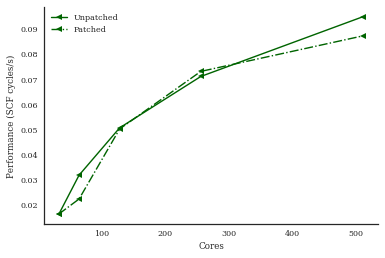

In [43]:
plt.plot(cores_unpatched, [1/x for x in scf_unpatched], '<-', color='darkgreen', label='Unpatched')
plt.plot(cores_patched, [1/x for x in scf_patched], '<-.', color='darkgreen', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Performance (SCF cycles/s)')
plt.legend(loc='best')
sns.despine()

### GROMACS

In [9]:
from appanalysis import gromacs

In [10]:
gmx_u = {2:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_2nodes_201712010921.log',
              4:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_4nodes_201711301547.log',
              8:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_8nodes_201712010955.log',
              16:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_16nodes_201711301527.log',
              32:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_32nodes_201711301537.log'
               }

In [11]:
gmx_cores_u, gmx_perf_u, gmx_su_u = gromacs.calcperf(gmx_u, cpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              64           0.108            1.00
              4             128           0.198            1.83
              8             256           0.327            3.03
             16             512           0.513            4.75
             32            1024           0.777            7.19


In [12]:
gmx_p = {2:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_2nodes_201801151114.log',
              4:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_4nodes_201801151056.log',
              8:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_8nodes_201801151033.log',
              16:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_16nodes_201801151140.log',
              32:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_32nodes_201801151154.log'
               }

In [13]:
gmx_cores_p, gmx_perf_p, gmx_su_p = gromacs.calcperf(gmx_p, cpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              64           0.109            1.00
              4             128           0.197            1.81
              8             256           0.327            3.00
             16             512           0.526            4.83
             32            1024           0.755            6.93


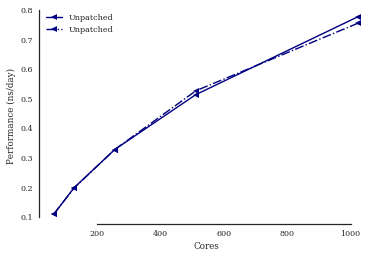

In [14]:
plt.plot(gmx_cores_u, gmx_perf_u, '<-', color='navy', label='Unpatched')
plt.plot(gmx_cores_p, gmx_perf_p, '<-.', color='navy', label='Unpatched')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine(trim=True)

### OpenSBLI

In [15]:
from appanalysis import osbli

In [16]:
osbli_u = {2:'../apps/OpenSBLI/results/CSD3Skylake/output_2nodes_201711251131.txt',
              5:'../apps/OpenSBLI/results/CSD3Skylake/output_5nodes_201711251143.txt',
              20:'../apps/OpenSBLI/results/CSD3Skylake/output_20nodes_201711251147.txt',
              32:'../apps/OpenSBLI/results/CSD3Skylake/output_32nodes_201711301117.txt',
             }

In [17]:
osbli_cores_u, osbli_time_u, osbli_su_u = osbli.calcperf(osbli_u, cpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           328.3            1.00
              5             160           154.4            2.13
             20             640            39.2            8.38
             32            1024            22.5           14.58


In [18]:
osbli_p = {2:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_2nodes_201801151114.txt',
              5:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_5nodes_201801151132.txt',
              8:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_8nodes_201801151056.txt',
           16:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_16nodes_201801151054.txt',
              32:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_32nodes_201801151040.txt',
             }

In [19]:
osbli_cores_p, osbli_time_p, osbli_su_p = osbli.calcperf(osbli_p, cpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           330.6            1.00
              5             160           138.6            2.39
              8             256            83.0            3.98
             16             512            41.4            7.98
             32            1024            21.2           15.57


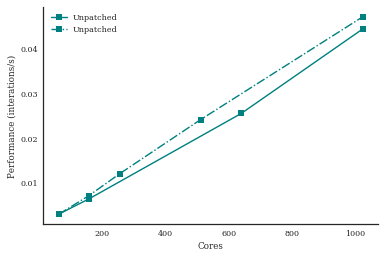

In [20]:
plt.plot(osbli_cores_u, [1/x for x in osbli_time_u], 's-', color='teal', label='Unpatched')
plt.plot(osbli_cores_p, [1/x for x in osbli_time_p], 's-.', color='teal', label='Unpatched')
plt.xlabel('Cores')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()

## Synthetic Benchmarks

## benchio (MPI-IO read bandwidth)

In [21]:
from synthanalysis import benchio
import pandas as pd

In [22]:
resdir = '../synth/benchio/results/CSD3Skylake'
files = benchio.get_filelist(resdir, "benchio_")
df_list = []
for file in files:
    df_list.extend(benchio.getperf(file))
benchio_res_u = pd.DataFrame(df_list) 
writers_u, maxwrite_u = benchio.get_perf_stats(benchio_res_u, -1, 256, 'max', writestats=True)

                                  Write                            \
                                    min       median          max   
Writers Striping LocalSize                                          
32      -1       256         495.391617   604.803836   636.878110   
64      -1       256         223.516885   619.982881   734.525128   
128     -1       256         272.915353  2193.856663  2426.772131   
256     -1       256         711.355222  3671.515853  4319.454011   
512     -1       256        4525.734573  5859.905924  7832.476586   
1024    -1       256        1388.155565  4950.487578  7280.052396   

                                        Count  
                                   mean   sum  
Writers Striping LocalSize                     
32      -1       256         596.340637    20  
64      -1       256         585.273656    20  
128     -1       256        1860.948735    30  
256     -1       256        3151.127936    20  
512     -1       256        5802.721034   

In [23]:
resdir = '../synth/benchio/results/CSD3Skylake-patched'
files = benchio.get_filelist(resdir, "benchio_")
df_list = []
for file in files:
    df_list.extend(benchio.getperf(file))
benchio_res_p = pd.DataFrame(df_list) 
writers_p, maxwrite_p = benchio.get_perf_stats(benchio_res_p, -1, 256, 'max', writestats=True)

                                  Write                            \
                                    min       median          max   
Writers Striping LocalSize                                          
32      -1       256         478.419608   498.712175   558.110451   
64      -1       256         599.035827   636.006058   642.350794   
128     -1       256        1670.827966  1938.053055  2006.403979   
256     -1       256        3570.643235  3743.316042  3839.521461   
512     -1       256        6090.346281  6441.059608  6589.572467   
1024    -1       256        5748.729080  6351.363864  6722.794248   

                                        Count  
                                   mean   sum  
Writers Striping LocalSize                     
32      -1       256         502.118539    10  
64      -1       256         632.220207    10  
128     -1       256        1918.325733    10  
256     -1       256        3708.826320    10  
512     -1       256        6376.192195   

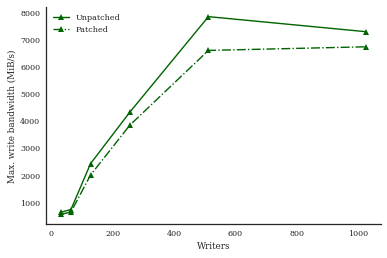

In [24]:
fig, ax = plt.subplots()
plt.plot(writers_u, maxwrite_u, 'r^-', color='darkgreen', label='Unpatched')
plt.plot(writers_p, maxwrite_p, 'r^-.', color='darkgreen', label='Patched')
plt.xlabel('Writers')
plt.ylabel('Max. write bandwidth (MiB/s)')
plt.legend(loc='best')
sns.despine()

### mdtest (Metadata Server performance)

In [25]:
from synthanalysis import mdtest

In [26]:
mdtest_cpn = {}
cores = {}
create = {}
stat = {}
remove = {}
sty = {}
systems = ['Unpatched','Patched']
test = 'mp-mf-sd'

In [27]:
files_u = {2:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_2nodes_201711281530.log',
               4:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_4nodes_201711281506.log',
               8:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_8nodes_201711281428.log',
               16:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_16nodes_201711281628.log',
               32:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_32nodes_201711281514.log'
              }

In [28]:
sys = 'Unpatched'
key = '{0},{1}'.format(sys, test)
mdtest_cpn[sys] = 32
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(files_u, test, mdtest_cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       10447.905       15785.713        7996.072
              4             128       21623.942       28257.865        8869.195
              8             256       40588.567       65347.554       18597.795
             16             512       54151.757      116107.385       31821.267
             32            1024       43346.112      142800.723       37725.149


In [29]:
files_p = {2:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_2nodes_201801151156.log',
               4:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_4nodes_201801151206.log',
               8:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_8nodes_201801151232.log',
               16:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_16nodes_201801151318.log',
               32:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_32nodes_201801151340.log'
              }

In [30]:
sys = 'Patched'
key = '{0},{1}'.format(sys, test)
mdtest_cpn[sys] = 32
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(files_p, test, mdtest_cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       12582.352       16876.589        8143.513
              4             128       24351.472       35458.157       10943.393
              8             256       42483.722       65726.348       19097.160
             16             512       39714.967      114334.240       24133.016
             32            1024       44550.951      121263.862       38387.316


#### Multiple processes each writing file to single directory

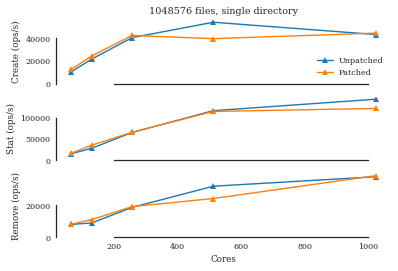

In [31]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1048576 files, single directory')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)

In [32]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
      Unpatched       54151.757      142800.723       37725.149
        Patched       44550.951      121263.862       38387.316


### b_eff HPCC MPI benchmark (random ring performance)

In [33]:
from synthanalysis import hpcc

In [36]:
beff_u = {2:'../synth/HPCC/beff_results/CSD3Skylake/nodes2ppn32_201711232059_hpccoutf.txt',
              4:'../synth/HPCC/beff_results/CSD3Skylake/nodes4ppn32_201711232109_hpccoutf.txt',
              8:'../synth/HPCC/beff_results/CSD3Skylake/nodes8ppn32_201711232113_hpccoutf.txt',
              16:'../synth/HPCC/beff_results/CSD3Skylake/nodes16ppn32_201711232116_hpccoutf.txt',
              32:'../synth/HPCC/beff_results/CSD3Skylake/nodes32ppn32_201711232118_hpccoutf.txt'
             }

In [37]:
beff_cores_u, beff_rrbw_u, beff_rrlat_u = hpcc.calcbeffperf(beff_u, cpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64           1.469           1.277
              4             128           1.416           1.362
              8             256           0.834           1.362
             16             512           1.081           1.431
             32            1024           0.793           1.431


In [38]:
beff_p = {2:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes2ppn32_201801151342_hpccoutf.txt',
              4:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes4ppn32_201801151318_hpccoutf.txt',
              8:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes8ppn32_201801151234_hpccoutf.txt',
              16:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes16ppn32_201801151230_hpccoutf.txt',
              32:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes32ppn32_201801151206_hpccoutf.txt'
             }

In [39]:
beff_cores_p, beff_rrbw_p, beff_rrlat_p = hpcc.calcbeffperf(beff_p, cpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64           1.416           1.277
              4             128           1.348           1.362
              8             256           0.828           1.431
             16             512           1.025           1.431
             32            1024           0.776           1.567


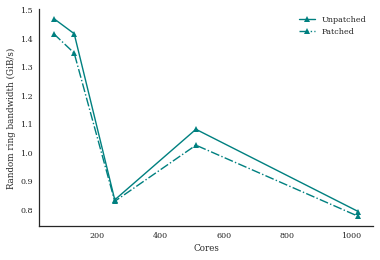

In [41]:
plt.plot(beff_cores_u, beff_rrbw_u, '^-', color='teal', label='Unpatched')
plt.plot(beff_cores_p, beff_rrbw_p, '^-.', color='teal', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Random ring bandwidth (GiB/s)')
plt.legend(loc='best')
sns.despine()

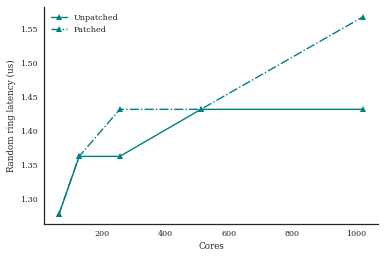

In [42]:
plt.plot(beff_cores_u, beff_rrlat_u, '^-', color='teal', label='Unpatched')
plt.plot(beff_cores_p, beff_rrlat_p, '^-.', color='teal', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Random ring latency (us)')
plt.legend(loc='best')
sns.despine()